Введите количество точек на графике (минимальное количество 30): 30
[[0.11706958 0.51391545]
 [0.01498228 0.44085817]
 [0.41044897 0.78643317]
 [0.32774612 0.13243041]
 [0.55100674 0.53714856]
 [0.43326888 0.98381417]
 [0.65905272 0.02614108]
 [0.34456324 0.30846142]
 [0.86166906 0.79949879]
 [0.03630472 0.56620586]
 [0.25867067 0.39352073]
 [0.8586675  0.32823739]
 [0.59641018 0.12918772]
 [0.42219813 0.99636302]
 [0.85642097 0.01127518]
 [0.66079892 0.50157519]
 [0.46528167 0.29806745]
 [0.25134005 0.49362901]
 [0.60452124 0.80141828]
 [0.37917373 0.9402202 ]
 [0.3828221  0.44170178]
 [0.0095322  0.42621555]
 [0.32703715 0.01593908]
 [0.83626261 0.28738271]
 [0.08970982 0.9316825 ]
 [0.91299925 0.6728143 ]
 [0.85459951 0.16052858]
 [0.23996251 0.14516223]
 [0.83486707 0.6243817 ]
 [0.05272484 0.18081322]
 [0.30114819 0.35220354]
 [0.760281   0.78633055]
 [0.84618296 0.34114519]
 [0.96199854 0.57059087]
 [0.29032377 0.57573261]
 [0.01802946 0.02163733]
 [0.84078196 0.4450855 ]
 [0.571

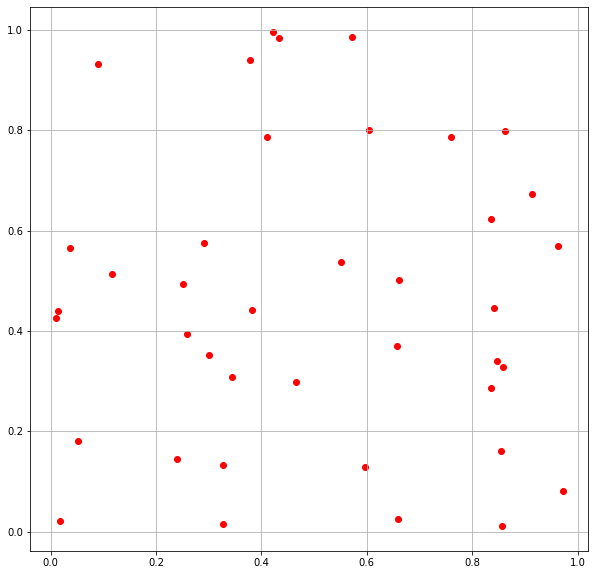

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Вводим точки напрямую 
col_points = int(input('Введите количество точек на графике (минимальное количество 30): '))
if col_points < 30:
    print('Введено слишком мало точек')
    col_points = 0
# Работаем с точками
array = np.empty((0,2), float)
current_point = 0
array = np.random.uniform(low=0, high=1, size=(40,2))
print(array)
# Выводим точки на график
fig, ax = plt.subplots(figsize=(10,10))
scatter1 = plt.scatter(array[:,0], array[:,1], color='red')
grid1 = plt.grid(True)
plt.show()

In [109]:
#### Радиус окружности
radius = float(input('Введите радиус окружности: '))

Введите радиус окружности: 0.2


In [110]:
def display_step(X, centroids, R):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    if len(X) > 0:
        plt.title(f'Forel Step {len(centroids)}')
        plt.scatter(X[:, 0], X[:, 1], marker="o", color='purple')
    plt.scatter(centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1], c='black', s=40)
    axes.add_patch(plt.Circle((centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def display(X, centroids, labels, R):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("FOREL алгоритм")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = centroids
    print('Количество классов = ',len(centroids))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def count_labels(cur_data, clusters):
    labels = np.zeros(len(cur_data))
    j = 0
    for c in clusters:
        for k in range(len(cur_data)):
            for el in c:
                if cur_data[k][0] == el[0] and cur_data[k][1] == el[1]:
                     labels[k] = j
        j += 1
    return labels

def cluster(points, radius, tol=1e-3):
    clusters = []
    centroids = []
    while len(points) != 0:
        current_point = get_random_point(points)
        neighbors = get_neighbors(current_point, radius, points)
        centroid = get_centroid(neighbors)
        while np.linalg.norm(current_point - centroid) > tol:
            current_point = centroid
            neighbors = get_neighbors(current_point, radius, points)
            centroid = get_centroid(neighbors)
        centroids.append(current_point)
        clusters.append(neighbors)
#         display_step(neighbors, centroids, radius)
        points = remove_points(neighbors, points)
    return centroids, clusters


def get_neighbors(p, radius, points):
    neighbors = [point for point in points if np.linalg.norm(p - point) < radius]
    return np.array(neighbors)

def get_centroid(points):
    return np.array([np.mean(points[:, 0]), np.mean(points[:, 1])])

def get_random_point(points):
    random_index = np.random.choice(len(points), 1)[0]
    return points[random_index]

def remove_points(subset, points):
    k = 0
    index = []
    for i in range(len(points)):
        for j in range(len(subset)):
            if (points[i][0] == subset[j][0]) and points[i][1] == subset[j][1]:
                index.append(i)
    a = np.delete(points[..., 0], index)
    b = np.delete(points[..., 1], index)
    p = np.c_[a, b]
    return np.array(p)

Количество классов =  13


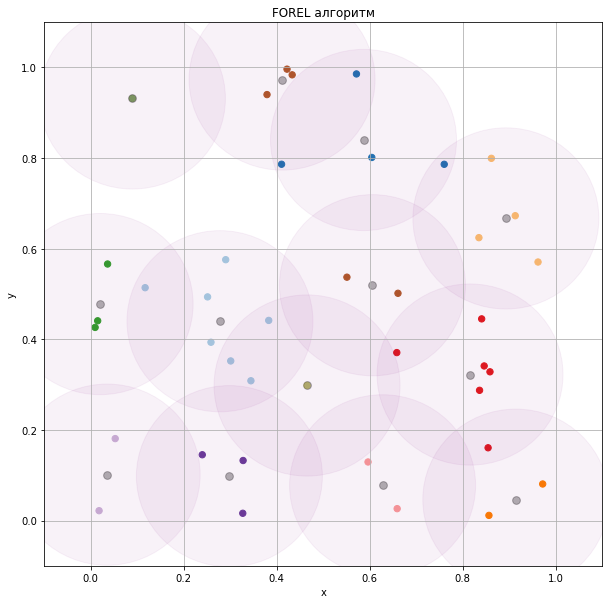

In [111]:
centroids, clusters = cluster(array, radius)
labels = count_labels(array, clusters)
display(array, centroids, labels, radius)

In [112]:
# Количество классов 
N = int(input('Введите количество классов: '))

Введите количество классов: 4


In [113]:
#Forel 2

def display(X, centroids, labels, R):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("FOREL 2")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = centroids
    print('Количество классов = ',len(centroids))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Количество классов =  4


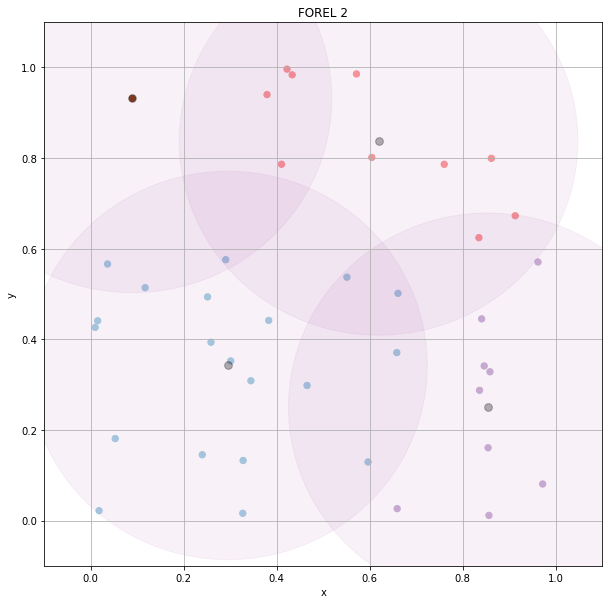

In [114]:
#Forel 2
while len(centroids) != N:
    if len(centroids) > N:
        radius = radius * 1.1
        centroids, clusters = cluster(array, radius)
        labels = count_labels(array, clusters)
    elif len(centroids) < N:
        radius = radius * 0.9
        centroids, clusters = cluster(array, radius)
    else:
        radius = radius
display(array, centroids, labels, radius)

In [115]:
# Алгоритм ближайших соседей
# Количество соседей
k = 3

Введите количество точек на графике: 1
[[0.00099548 0.80495238]]


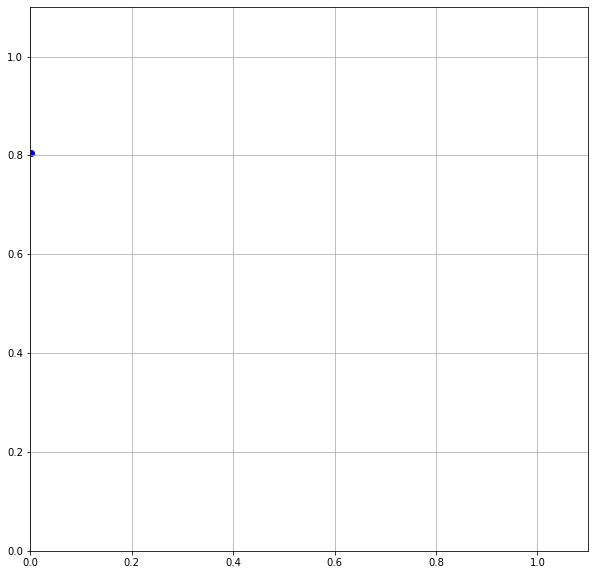

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Вводим точки напрямую 
col_points = int(input('Введите количество точек на графике: '))
# Работаем с точками
new_points = np.empty((0,2), float)
current_point = 0
new_points = np.random.uniform(low=0, high=1, size=(1,2))
print(new_points)
# Выводим точки на график
plt.figure(figsize=(10, 10))
plt.scatter(new_points[:,0], new_points[:,1], color='blue')
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
grid1 = plt.grid(True)
plt.show()

Количество классов =  4


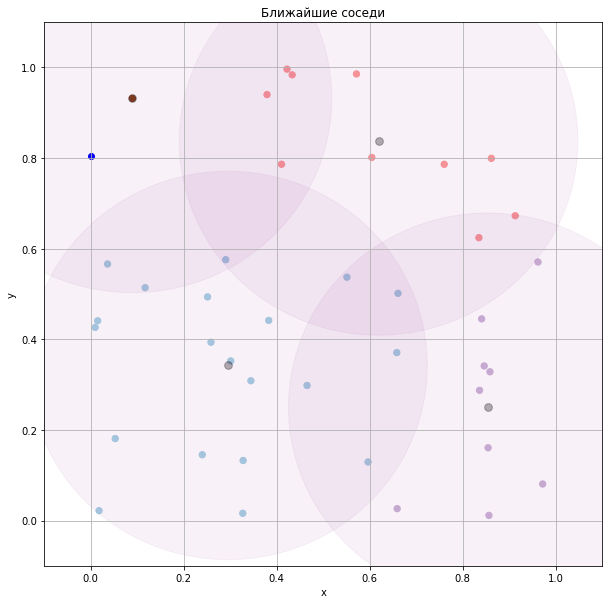

In [117]:
def display(X, centroids, labels, R, new_points,clusters):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("Ближайшие соседи")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = centroids

    print('Количество классов = ',len(centroids))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    plt.scatter(new_points[:,0], new_points[:,1], color='blue')
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
display(array, centroids, labels, radius, new_points,clusters)

In [126]:
import numpy as np
import math

def display(X, centroids, labels, R, new_points, clusters, k):
    X = np.array(X)
    centroids = np.array(centroids)
    plt.figure(figsize=(10, 10))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("Ближайшие соседи")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = centroids
    clusters_ok = clusters
    points_draw = X
    real_points_draw = X
    linewidth = np.empty((0, 1), int)
    min_index = []
    points_class = np.empty((0, 2), float)
    classes_in_point = np.empty((0, 1), int)
    
    k = k #колич ближ соседей
    
    
        
    for i in range(len(X)):
        linewidth = np.append(linewidth, 0)
        
    '''Функция для подсчета расстояния между точками'''
    def shortDistance(x1, y1, x2, y2):
        x1, y1, x2, y2 = x1, y1, x2, y2
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)    
    
    for i in range(len(new_points)):
        distance = np.empty((0, 1), float) #массив куда будут помещаться все расстояния до точки
        for j in range(len(points_draw)):
            distance_between_dots = shortDistance(points_draw[j][0], points_draw[j][1], new_points[i][0], new_points[i][1])
            distance = np.append(distance, distance_between_dots)
#         print("Массив расстояний",i + 1,distance)
        min_value = min(distance)
        

    indices = np.argpartition(distance, k)[:k]
    
    k_smallest = distance[indices]
    
    while len(min_index) < k:
        if distance[i] in k_smallest:
            min_index.append(i)
        i += 1
    
    for i in range(len(min_index)):
        point = X[min_index[i]]

        for n in range(len(clusters)):
            for j in range(len(clusters[n])):
                if clusters[n][j][0] == point[0] and clusters[n][j][1] == point[1]:
                    classes_in_point = np.append(classes_in_point, n + 1)
                    
    """Вывод числа которое встречается большее количество раз в классах"""
    counts = np.bincount(classes_in_point)
    max_count = np.max(counts)
    most_common_numbers = [num for num, count in enumerate(counts) if count == max_count]
    most_common_numbers = most_common_numbers[0]
    print(f'Точка {new_points[0]} относится к классу с номером {most_common_numbers}' )

    clusters_ok[most_common_numbers - 1] = np.append(clusters_ok[most_common_numbers - 1], new_points, axis=0)
    points_draw = np.append(points_draw, new_points, axis = 0)
    X = points_draw

    labels = count_labels(points_draw, clusters_ok) 
    
    print('Количество классов = ',len(centroids))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Paired')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Точка [0.00099548 0.80495238] относится к классу с номером 1
Количество классов =  4


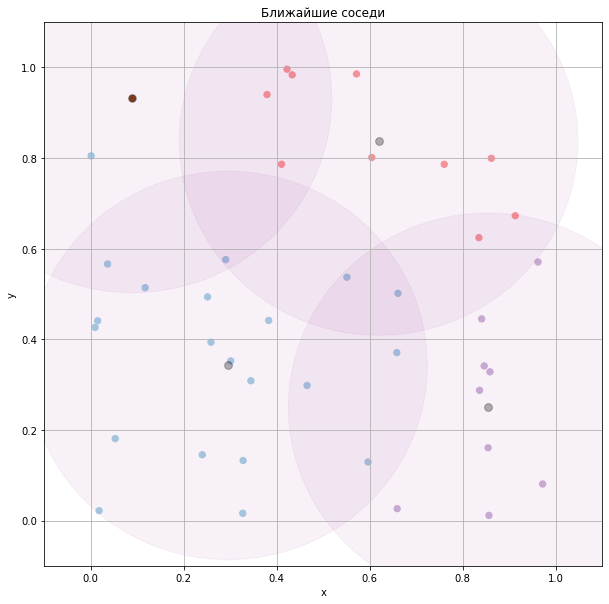

In [127]:
display(array, centroids, labels, radius, new_points, clusters, k)